<a href="https://colab.research.google.com/github/FranciscoAguiar/DataScienceProgramming/blob/master/regressaoLinearMult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Simples

**Aluno: Francisco de Assis Marinho Aguiar**

## Objetivo

Construir um modelo de regressão linear simples, que seja capaz de fazer previsões sobre o valor médio das casas em função do valor total da taxa de imposto.

## Dataset 

Boston Housing Dataset 

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town                                        (taxa de criminalidade per capita na cidade )
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. )
3. INDUS: proportion of non-retail business acres per town (proporção de acres de negócios não varejistas por cidade )
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário))
5. NOX: nitric oxides concentration (parts per 10 million) (concentração de óxidos nítricos (partes por 10 milhões) )
6. RM: average number of rooms per dwelling (número médio de quartos por habitação)
7. AGE: proportion of owner-occupied units built prior to 1940 (proporção de unidades ocupadas pelo proprietário construídas antes de 1940 )
8. DIS: weighted distances to five Boston employment centres (distâncias ponderadas até cinco centros de empregos de Boston )
9. RAD: index of accessibility to radial highways (índice de acessibilidade a rodovias radiais )
10. TAX: full-value property-tax rate per 10,000 (valor total da taxa de imposto sobre a propriedade por 10.000 )
11. PTRATIO: pupil-teacher ratio by town (proporção aluno-professor por cidade )
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 (Bk - 0,63) ^ 2, onde Bk é a proporção de negros por cidade )
13. LSTAT: % lower status of the population (% de status inferior da população )
14. TARGET: Median value of owner-occupied homes in 1000 dolarés (Valor médio das casas ocupadas pelo proprietário em US $ 1.000 )

In [70]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
%matplotlib inline 

## Regressão Linear com statsmodel

In [137]:
x = sm.add_constant(dataset['PTRATIO'])

In [143]:
X = dataset['PTRATIO'] 
Y = dataset['target']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.61e-34
Time:                        18:25:06   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

# Interpretanto os resultados

Adj. R-squared : R-quadrado reflete o ajuste do modelo. Os valores de R ao quadrado variam de 0 a 1, onde um valor mais alto geralmente indica um melhor ajuste, supondo que certas condições sejam atendidas.

std err: reflete o nível de precisão dos coeficientes. Quanto menor for, maior será o nível de precisão

P> | t |: é o seu p-value. Um valor de p inferior a 0,05 é considerado estatisticamente significativo.

Confidence Interval : O intervalo de confiança .

In [132]:
type(X)

pandas.core.frame.DataFrame

In [133]:
d = {'col1': [6.9, 7.0]} #testando alguns valores no modelo
df = pd.DataFrame(data=d)
df

,col1
0,6.9
1,7.0


In [134]:
X = sm.add_constant(df)
predictions = model.predict(X) 

In [135]:
print(predictions)

0    28.133931
1    29.044142
dtype: float64


### Gerando um ScatterPlot com a Linha de Regressão

In [144]:
valores_previstos = model.predict(X)

In [145]:
# Range de valores para x e y
x_range = [dataset['PTRATIO'].min(), dataset['PTRATIO'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

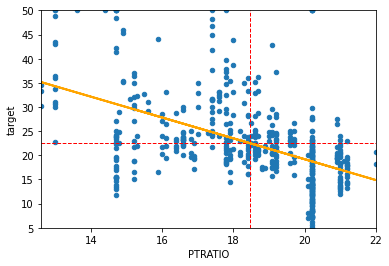

In [146]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'PTRATIO', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['PTRATIO'].mean(),dataset['PTRATIO'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['PTRATIO'], valores_previstos, '-', color = 'orange', linewidth = 2)